In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.6f}'.format)

# Cargar Dataset
Además de cargar el dataset, agregamos la columna de 1's para tener la columna de constante

In [2]:
df = pd.read_csv('dat.csv', header=None)
df.insert(loc=0, column='ones', value=1) 
df.head()

ones        0         1           2
0     1 0.931719 50.942832 2596.040230
1     1 0.796997 50.312938 2532.026902
2     1 1.115603 50.156194 2516.888332
3     1 1.064629 50.774814 2579.215190
4     1 1.796804 50.055668 2508.798424

### Hacemos un shuffle del dataset

In [3]:
newdf = df.sample(frac=1)
newdf

ones         0          1            2
135777     1 44.553225 177.860982 33619.518676
129193     1 98.823571 171.498345 39177.780525
84416      1  4.131022 129.902825 16891.809410
92535      1 33.963908 137.006918 19924.442724
63767      1 42.094030 110.004079 13872.804762
...      ...       ...        ...          ...
78912      1 28.806151 124.865058 16421.076946
11554      1 88.927726  61.097027 11640.987142
44805      1  1.320731  92.691342  8593.429123
68474      1 19.093767 115.097530 13612.013415
77784      1 46.251268 123.817342 17469.914075

[160000 rows x 4 columns]

### Convertimos el dataset en un numpy array para poder procesarlo

In [4]:
arr = np.array(newdf)
arr

array([[1.00000000e+00, 4.45532253e+01, 1.77860982e+02, 3.36195187e+04],
       [1.00000000e+00, 9.88235710e+01, 1.71498345e+02, 3.91777805e+04],
       [1.00000000e+00, 4.13102244e+00, 1.29902825e+02, 1.68918094e+04],
       ...,
       [1.00000000e+00, 1.32073148e+00, 9.26913415e+01, 8.59342912e+03],
       [1.00000000e+00, 1.90937674e+01, 1.15097530e+02, 1.36120134e+04],
       [1.00000000e+00, 4.62512680e+01, 1.23817342e+02, 1.74699141e+04]])

# Partir el Array
Partimos el array en un training, validating (CV), y testing set.

In [5]:
# Partir el dataset en training 75%, cross validation testing 15%, y testing 15%
train, validate, test = np.split(arr, [int(len(arr)*0.7), int(len(arr)*0.85)])

### Separamos las columnas "X" y "Y"

In [6]:
xtrain = train[:,0:3]
ytrain = train[:,3].reshape(len(xtrain),1)
xcv = validate[:,0:3]
ycv = validate[:,3].reshape(len(xcv),1)
xtest = test[:,0:3]
ytest = test[:,3].reshape(len(xtest),1)

# Funciones
Tenemos la función de costo, del gradiente lineal de costo y el gradiente final

In [7]:
def linear_function_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def linear_gradient_cost(X, y, theta, lambdaparam=10):
    h = X @ theta
    lambdapart = (lambdaparam/(2*len(X))) * (theta**2).sum()
    return ((X.T @ (h - y)) / len(X)) + lambdapart

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000, lambdaparam=10):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta, lambdaparam) * theta
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

Generamos un theta random para poder iniciar los procesos

In [8]:
m, n =  xtrain.shape
random_theta = np.random.rand(n,1)
random_theta

array([[0.28304015],
       [0.30163881],
       [0.42453056]])

# Polinomio 1

In [9]:
theta_results1, costs1, thetas1 = gradient_descent_cost(xtrain, ytrain, random_theta, linear_function_cost, linear_gradient_cost)
theta_results1

array([[  0.26414368],
       [ 17.48624067],
       [170.04873443]])

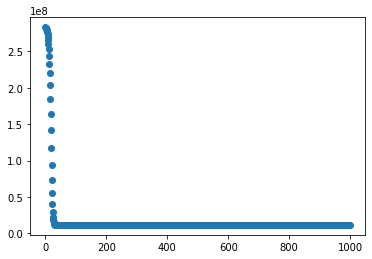

In [10]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs1)
plt.show()

In [11]:
costs1[-1]

11502937.242762567

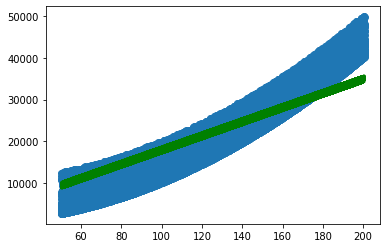

In [12]:
plt.scatter(xcv[:, 2], ycv)
plt.plot(xcv[:, 2], xcv @ theta_results1, color='green')
plt.show()

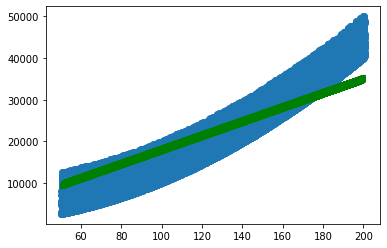

In [13]:
plt.scatter(xtest[:, 2], ytest)
plt.plot(xtest[:, 2], xtest @ theta_results1, color='green')
plt.show()

In [14]:
linear_function_cost(xcv,ycv,theta_results1)

11560791.70291884

In [15]:
linear_function_cost(xtest,ytest,theta_results1)

11551169.345655091

In [16]:
costs1[-1]

11502937.242762567

## Conclusión Polinomio 1
Vemos que no se ajusta de la manera más óptima pero es un buen inicio. Las funciones de costo se parecen en los 3 sets, por lo cual se ajusta bien.

# Polinomio 2
Ahora vamos a agregar otra columna, donde simplemente será el valor al cuadrado de la primera (no la de constantes).

In [17]:
pol2 = (xtrain[:,1]**2).reshape(len(xtrain),1)
xtrain2 = np.append(xtrain, pol2, axis=1)
pol2 = (xcv[:,1]**2).reshape(len(xcv),1)
xcv2 = np.append(xcv, pol2, axis=1)
pol2 = (xtest[:,1]**2).reshape(len(xtest),1)
xtest2 = np.append(xtest, pol2, axis=1)

Modificamos el shape de thetas para tomar en cuenta la nueva columna

In [18]:
m,n = xtrain.shape
random_theta = np.random.rand(n+1,1)
random_theta

array([[0.06136179],
       [0.18115156],
       [0.93136403],
       [0.15228151]])

Le modificamos el learning rate a un número más pequeño, para que la función logre converger.

In [19]:
theta_results2, costs2, thetas2 = gradient_descent_cost(xtrain2, ytrain, random_theta, linear_function_cost, linear_gradient_cost, learning_rate=0.000000001)
theta_results2

array([[0.06186734],
       [0.21831711],
       [4.15572496],
       [3.81360011]])

# Analizar función de costo

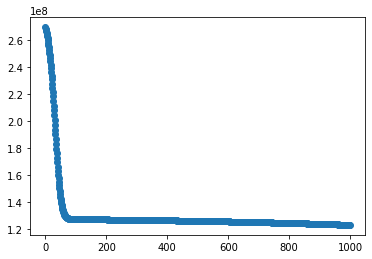

In [20]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs2)
plt.show()

In [21]:
costs2[-1]

123167938.8270481

In [22]:
linear_function_cost(xcv2, ycv, theta_results2)

124604591.02450968

In [23]:
linear_function_cost(xtest2, ytest, theta_results2)

124455959.39230481

El modelo se apega bien a los datos de entrenamiento, los de CV, como también a los de testing. Pero tienen costos más altos comparados a los de polinomio de grado 1.

# Diferencia de costos entre polinomio grado 1 y grado 2

In [24]:
print(f"Costo1 {costs1[-1]} vs Costo21 {costs2[-1]}")

Costo1 11502937.242762567 vs Costo21 123167938.8270481


In [25]:
print(f"Diferencia {costs2[-1] - costs1[-1]}")

Diferencia 111665001.58428553


Podemos ver que el último costo del modelo con polinomio 2 tiene más error que el de polinomio 1. Tiene problema con bias, con la gráfica podemos observar que la función de costos baja pero nunca vuelve a subir. Si lograra volver a subir sería un problema de varianza.

## Cambiar parámetros
Sabemos que la curva de costo con polinomio de grado 1 tiene bias. Vamos a incrementar *K* para quitarle bias, y de igual manera vamos a modificar *lambda*, que en este caso lo vamos a reducir para disminuir el bias.

In [26]:
pol3 = (xtrain[:,1]**3).reshape(len(xtrain),1)
xtrain3 = np.append(xtrain, pol3, axis=1)
pol3 = (xcv[:,1]**3).reshape(len(xcv),1)
xcv3 = np.append(xcv, pol3, axis=1)
pol3 = (xtest[:,1]**3).reshape(len(xtest),1)
xtest3 = np.append(xtest, pol3, axis=1)

In [27]:
m,n = xtrain3.shape
random_theta = np.random.rand(n,1)
random_theta

array([[0.10177069],
       [0.18738679],
       [0.69774362],
       [0.13538544]])

In [28]:
theta_resultsf, costsf, thetasf = gradient_descent_cost(xtrain3, ytrain, random_theta, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000000000001,lambdaparam=5)
theta_resultsf

array([[0.10177069],
       [0.18738678],
       [0.69774361],
       [0.13536661]])

Estamos viendo que los coeficientes se volvieron más pequeños, lo cual nos indica que no necesariamente incrementar el *k* nos ayude a tener un mejor modelo.

In [29]:
costsf[-1]

805242066.9034055

Así mismo, tenemos costos más altos. Nos quedaremos entre el polinomio 1 y 2.

In [30]:
m,n = xtrain.shape
random_theta = np.random.rand(n,1)
random_theta

array([[0.08597015],
       [0.94022191],
       [0.84568426]])

In [31]:
theta_results1, costs1, thetas1 = gradient_descent_cost(xtrain, ytrain, random_theta, linear_function_cost, linear_gradient_cost)
theta_results1

array([[7.95257909e-02],
       [2.19247141e+01],
       [1.68446013e+02]])

In [32]:
costs1[-1]

11475426.485734455

In [33]:
theta_resultsf, costsf, thetasf = gradient_descent_cost(xtrain, ytrain, random_theta, linear_function_cost, linear_gradient_cost, lambdaparam=2)
theta_resultsf

array([[7.95338862e-02],
       [2.19253230e+01],
       [1.68445853e+02]])

In [34]:
costsf[-1]

11475424.262397656

In [35]:
print(f"CostoF {costsf[-1]} vs Costo1 {costs1[-1]}")

CostoF 11475424.262397656 vs Costo1 11475426.485734455


In [36]:
print(f"Diferencia {costsf[-1] - costs1[-1]}")

Diferencia -2.223336799070239


Vemos que al reducir lambda para disminuir el bias del modelo, logramos reducir el error apenas en 2 puntos.

# Conclusiones
## Polinomio elegido: K = 1
Tiene el menos error a comparación de los *K = 2 y 3*
## Lambda utilizado para regularizar: 2
Probamos reducirlo más pero no causa cambios significativos.
## Convergencia
El modelo converge en las primeras 1,000 iteraciones
## Problemas con el Modelo
Tiene bias, anteriormente mencionabamos como la gráfica de costo bajaba pero no volvía a subir de nuevo. Lo cual indicaba un problema de bias que tratamos de resolver subiendole *k* pero nos incrementó el costo. Por lo cual decidimos reducir *lambda* que ayudó pero no sustancialmente.